Importing important libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/diabetes - diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data normalisation and cleaning

In [ ]:
df=df.dropna()

In [ ]:
df.duplicated().sum()

0

Removing outliers

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

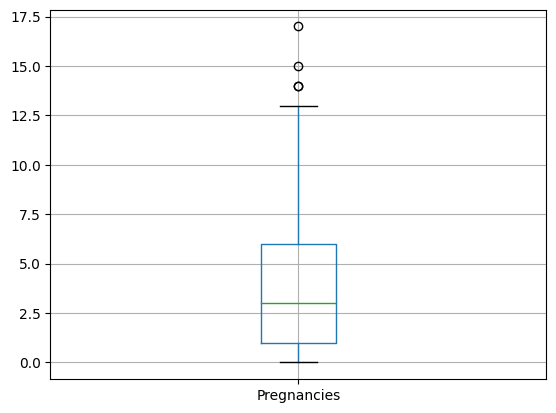

In [ ]:
df.boxplot(column=['Pregnancies'])
plt.show()

In [ ]:
low,up=remove_outlier(df['Pregnancies'])
df['Pregnancies']=np.where(df['Pregnancies']>up,up,df['Pregnancies'])
df['Pregnancies']=np.where(df['Pregnancies']<low,low,df['Pregnancies'])

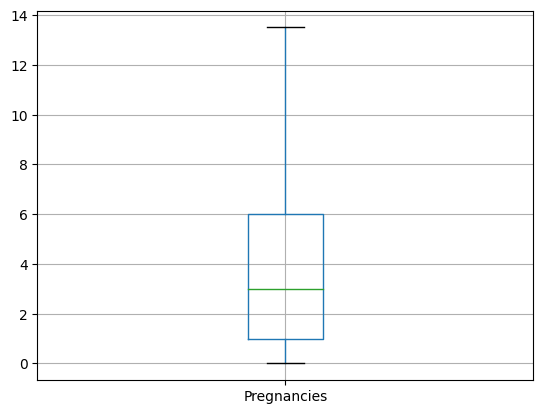

In [ ]:
df.boxplot(column=['Pregnancies'])
plt.show()

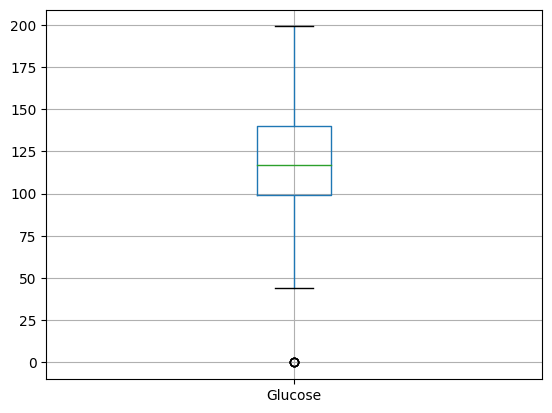

In [ ]:
df.boxplot(column=['Glucose'])
plt.show()

In [ ]:
low,up=remove_outlier(df['Glucose'])
df['Glucose']=np.where(df['Glucose']>up,up,df['Glucose'])
df['Glucose']=np.where(df['Glucose']<low,low,df['Glucose'])

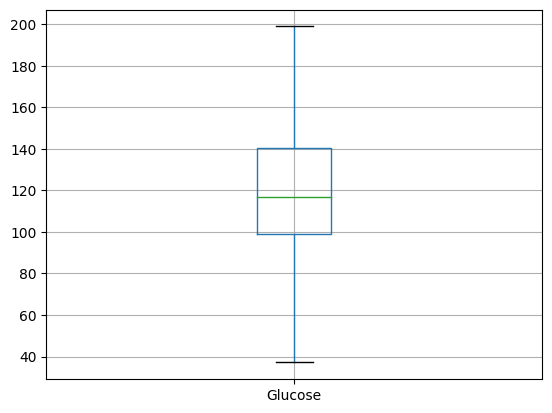

In [ ]:
df.boxplot(column=['Glucose'])
plt.show()

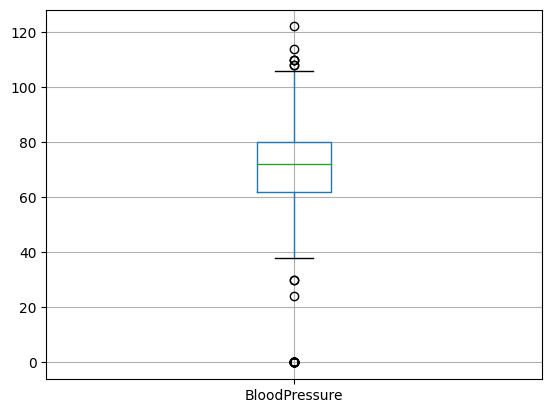

In [ ]:
df.boxplot(column=['BloodPressure'])
plt.show()

In [ ]:
low,up=remove_outlier(df['BloodPressure'])
df['BloodPressure']=np.where(df['BloodPressure']>up,up,df['BloodPressure'])
df['BloodPressure']=np.where(df['BloodPressure']<low,low,df['BloodPressure'])

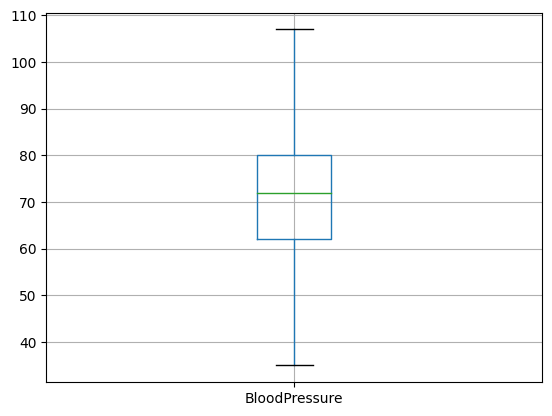

In [ ]:
df.boxplot(column=['BloodPressure'])
plt.show()

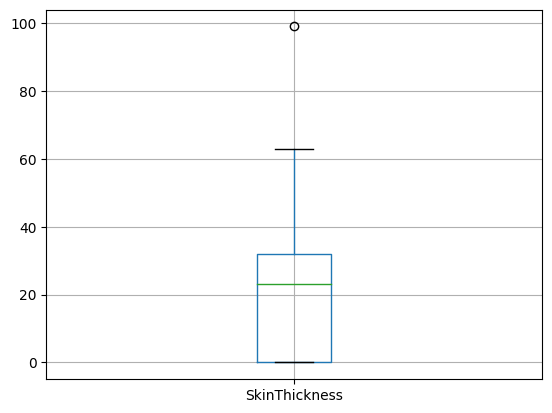

In [ ]:
df.boxplot(column=['SkinThickness'])
plt.show()

In [ ]:
low,up=remove_outlier(df['SkinThickness'])
df['SkinThickness']=np.where(df['SkinThickness']>up,up,df['SkinThickness'])
df['SkinThickness']=np.where(df['SkinThickness']<low,low,df['SkinThickness'])

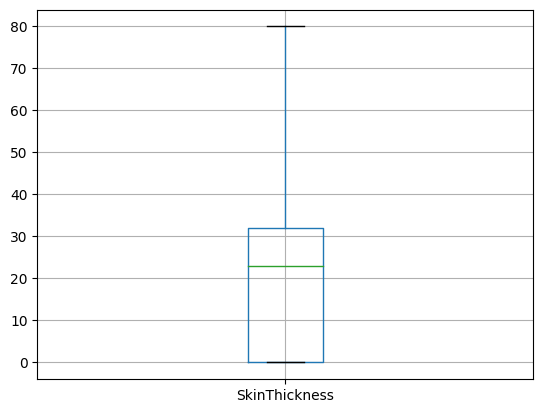

In [ ]:
df.boxplot(column=['SkinThickness'])
plt.show()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [ ]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

Using logistic regression for classification

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=10)
clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [ ]:
print(clf.predict([[5,166,72,19,175,25.8,0.587,51]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1-> represting that the person will have diabetes

Using decision tree classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print(clf.predict([[5,166,72,19,175,25.8,0.587,51]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1-> showing that the person will have diabetes

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

Support vector machine classifier

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7858472998137802


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(X_test)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1]
The person is not diabetic
